# Outlier Detection



The idea in outlier detection is to find points that are
different. There are two quite related kinds of outlier
detection summarized under outlier detection. There's
outlier detection and novelty detection.

#Motivation
.padding-top[
.left-column[
![:scale 100%](images/outlier_detection.png)
]

.right-column[
![:scale 100%](images/novelty_detection.png)
]
]


Both are unsupervised methods. The idea is to find things
that are different. In outlier detection, usually, your
training dataset also contains outliers which makes it a bit
dirty, while in novelty detection, you get a dataset and
then, later on, someone gives you new data and asks you what
is new here. So in novelty detection, your dataset would be
clean.

But in both, you want to identify something that's sort of
different from the standard distribution. Only, in the
outlier detection case, there are already different samples
in your training dataset.

This is one of the rigidly few unsupervised problems that
are pretty heavily used in practice.



- Find points that are “different” within the training set (and in the future).

- “Novelty detection” - no outliers in the training set.

- Outliers are not labeled! (otherwise it’s just imbalanced classification)

- Often outlier detection and novelty detection used interchangeably in practice.

## Applications

- Fraud detection (credit cards, click fraud, ...)

- Network failure detection

- Intrusion detection in networks

- Defect detection (engineering etc…)

- News? Intelligence?



- usual assumption: all outliers are different in a different way.
- Often people use classification datasets for outlier detection:
 that's a bit strange. See homework results.

## Basic idea

- Model data distribution $p(X)$

--

- Outlier: $p(X) 
<
 \varepsilon$

--

- For outlier detection: be robust in modelling $p(X)$



The main idea is, you model your data distribution, p(X).
And then you look at the data points that are unlikely under
the model. So if it's unlikely under the model, then it's
probably an outlier.

If you’re doing outlier detection that means your sample is
going to be contaminated. So they're outliers in the dataset
X already if that is the case, you want to be robust in
modeling p(X), so you want to model p(X) in a way that is
robust to outliers.

Both of these tasks are generally ill-defined. So unless you
actually know the real data distribution, how good something
does is hard to measure. Usually, you don't have ground
truth of what the outliers are if you have the ground truth
what the outliers are, you could just do an imbalance
classification task.

So similar to clustering, what we're doing here is building
a model, trying to find some outliers, and then check if
they're actually outliers. If we are satisfied with the
things that our model finds, then we can put into
production. But there's no guarantee that it's going to find
like x fraction of the outliers and since we don't have
labeled data, usually, we can't really measure our recall.
We won't ever know about the samples that we didn't find.

So maybe with respect to the homework and in the homework
actually have ground truth data. And it's similar to the
clustering setting, where researchers are basically cheating
and evaluating methods that are unsupervised in a supervised
manner. So once you have ground truth label, you can
evaluate your outlier detection, using, for example, AUC,
which is what you're going to do your homework.

But in a real-world setting, if you had the labels, you
would never use outlier detection.

Again, similar to clustering, what makes an outlier in a
particular dataset is ill-defined. So depends on the
application, what do you want to consider an outlier or not.
So in the homework, it’s ill and healthy, and the ill people
are the outliers. But it could also be that the people that
are much older and everybody else are the outliers.

If there's sort of a very clear density model, and so you
don't know what the density of the data is supposed to look
like and then, you know, things that don't share this
density, then you can sort of define this. But usually you
don't know what the density supposed to look like and so
there's no clearly defined notion of what is an outlier.
Similarly only, there's no clearly defined solution of what
should be a cluster.

So we're going to talk through a couple of different
algorithms that make different assumptions about what makes
a data point an outlier. So here, I said, we start usually
with a data distribution p(X).



- Task is generally ill-defined (unless you know the
real data distribution).
- Task is generally ill-defined (unless you know the
real data distribution).

#Elliptic Envelope

$$p(X) = \mathcal{N}(\mu, \Sigma)$$

.center[
![:scale 60%](images/elliptic_envelope.png)
]



This leads to the elliptic envelope outlier detection.
Basically, it fits a Gaussian into the data, and then it
looks at the points that are not fit well by the Gaussians
and those points are the outliers. Since this is meant for
the outlier detection task, what we're trying to do is
actually trying to find a robust estimate of the mean and
covariance matrix so that we can tolerate some outliers in
the training dataset, and still sort of recover the real
covariance matrix.

In this illustration, the black points, inliers, are what
you expect the data to look like and the outlier
distribution is plotted in red.

They overlap, so usually in unsupervised methods, you will
never label any of these red points as outliers but we could
try to figure out that these points here are outliers.

The way that elliptic envelope works are that it finds a
robust version of the variance matrix. Basically, it finds
the covariance matrix with the smallest determinant that
still covers a large portion of the data.

In most outlier detection methods, you have to specify how
many outliers you expect. So here, let's say we specify 10%
of the data to be outliers, then it will try to construct
the covariance matrix that covers 90% of the data, but holds
the lowest possible determinant.

If you do this, you get the red dotted circles, which are
the contours covariance fitted with the robust estimate and
the blue circles are the covariance fitted with the maximum
likelihood estimates, using all the data.

Obviously, these outliers can disturb the covariance matrix
and so the blue is sort of too thick in one direction
whereas the red is not. So now, if you have this red model,
you can basically say, all the data lies within these two
standard deviations and so everything outside here is an
outlier.


Fit robust covariance matrix and mean
FIXME add slide on Covariance: Minimum Covariance Determination (MinCovDet)

## Elliptic Envelope

- Preprocessing with PCA might help sometimes.

.smaller[
```python
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X)
pred = ee.predict(X)
print(pred)
print(np.mean(pred == -1))
```]

.smaller[
```python
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1]
0.104

```]



The way we do this in scikit-learn. The covariance module
has all the robust covariance methods. As I said, you have
to specify the contamination, which is how many outliers do
you expect. Here, I set it to 10%.

If I predict I get 1s and -1s. All the outlier models in
scikit-learn use 1 for inliers and -1 to outliers.

The mean of the prediction tells me that about 10% of the
training data was labeled as an outlier, which is what we
would expect, given that we set it as 10%.  You could also
get a continuous score saying how much of an outlier is each
point with the score samples methods.

Here, in the elliptic envelope, contamination parameter
changes how the model is fit, for some other models, this
will actually only change the threshold. It’s important here
to have the right contamination parameters for the right
covariance fit.

For real-world model, set it based on what your expectations
are.

+++

## Failure-case: Non-Gaussian Data

.center[
![:scale 80%](images/elliptic_envelope_plot.png)
]



If the data is not Gaussian, we get this.

In this dataset, my intuition was that the isolated three
points are the outliers and the rest are the normal data.
Since the data is non-Gaussian, it gives you 10% as outliers
that are furthest away from the mean. And this is not what I
wanted at all.

So if your data is very non-Gaussian, then the method will
not clearly work well.

Now, we could obviously use a more complicated density
model. So we talked about Gaussian mixture models, we could
use a Gaussian mixture model. Instead of fitting a single
Gaussian, we could try to fit multiple Gaussian. If you just
use the Gaussian mixture models in scikit-learn, they will
not do a robust fit, so that might make more sense in the
novelty detection than in the outlier detection sense
because it will try to fit all of the data. You can still
try to do it on the outlier detection task and just fit, so
if I fit three Gaussians here, it'll probably give me the
right outliers. But then again, I need to know what the
number of components is for my GMM, for this to work well.

So I still to make the assumptions about what the density
is.

Another approach is instead of having a parametric density
model like this, we can do a non-parametric density model
like a kernel density estimate.


Could do mixtures of gaussians obviously!

## Kernel Density


![:scale 80%](images/kde_vs_histogram.png)



KDE is a most simple non-parametric estimate for probability
distributions. The ticks at the bottom in the left plot are
data points. One way to visualize the distribution is to do
a histogram.

For the KDE estimate in the right, we put a small Gaussian
blob around each data point. So here, each data point here
at the bottom corresponds to one of these Gaussians and then
we just sum them all up and this gives you sort of this
smooth density here.

So this a little bit like a GMM where we have as many
components as data points. You could also use other kernels.


The word kernel here means slightly different than in SVMs.
Kernel here means kernel in the sense of signal processing.
So another commonly used kernel here is the top hat kernel,
which is a kernel in the signal processing sense but it's
not a kernel in the support vector machine sense, the
Gaussian kernel was the kernel in both senses.

A kernel can mean a lot of different things. And here, it
means basically windowing function. And so any windowing
function would work for this, you kind of put a little bit
of probability math around each data point.

An obvious problem with this is that you need to pick the
bandwidth.



- Non-parametric density model

- Gaussian blob on each data point

- Doesn’t work well in high dimensions
+++

## Kernel Bandwidth

![:scale 50%](images/kde_bandwidth.png)



So depending on what bandwidth you pick, you can either over
smooth or under smooth the data. Here, in red, you’ve picked
too small of bandwidth while in green, you’ve picked two
large of bandwidth and black is probably a decent bandwidth.


Again, this is an unsupervised problem. So it's very hard to
do this. You can actually use cross validation to adjust the
bandwidth. So you can look at what's the score of the held
out data.

This is also not a robust estimate. So if you have outliers
in your data, the outliers in your data might influence your
estimate.

The other problem with this is that KDDs don't work in
higher dimensions. You can obviously not only do this
1-dimension, but you can also do this in any number of
dimensions. But here, you get the curse of dimensionality.
Basically, if you have higher dimensional space, you need
more and more data points to actually fill the space with
these small Gaussian blobs. If you would want to do a
histogram, in like 10 dimensions, and you don't have enough
data, then most of the histogram cells will be empty. And
here, this is only like a smooth version of the histogram so
it has the same problem.

So if your space is in high dimensional, most of the space
will be empty and this is not going to work very well.


- Need to adjust kernel bandwidth

- Unsupervised model, so how to pick kernel bandwidth?
- cross-validation can be used to pick the bandwidth, but if there's outliers in the training
data, could go wrong?


+++

.smaller[
```python
kde = KernelDensity(bandwidth=3)
kde.fit(X_train_noise)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)
```]

.center[
![:scale 70%](images/kernel_density_bw3.png)
]


If your space is low dimensional, and you can plot it, it
might work nicely. So here, I might have used the
cross-validation to find out the bandwidth of 3 is good. And
then I can look at the scores. So here, KDE is not an
outlier detection method in scikit-learn, but I can use it
as an outlier detection method by just looking at score
samples, which are the log probabilities of all the data
points under this probability model. And I say that
everything that's higher than the 10th percentile is an
inlier.

So basically, now I label 10% of the data as outliers and I
actually get the right three points that I wanted and a
couple more points. Obviously, I get more points, because I
told them I want 10% of my data to be outliers.

So this is a really is a very simple method. But it doesn’t
work well in higher dimensions and it gets very slow since
you have a lot of these kernels that you need to evaluate.
So you need to compute the distance between all pairs of
points mostly.

## One Class SVM

- Also uses Gaussian kernel to cover data

- Only select support vectors (not all points)

- Specify outlier ratio (contamination) via nu


.smaller[
```python
from sklearn.svm import OneClassSVM
scaler = StandardScaler()
X_train_noise_scaled = scaler.fit_transform(X_train_noise)
oneclass = OneClassSVM(nu=.1).fit(X_train_noise_scaled)
pred = oneclass.predict(X_train_noise_scaled)
```]



A more sophisticated variant of this is the one class SVM.
This also uses Gaussian kernels to basically cover the data.
But it selects only support vectors, not all points as basis
points. You get a similar function, in KDE.

But the density function is supported only by some support
vectors. Again, you need to specify the bandwidth parameter
gamma. So this only makes sense with an RVF kernel. It’s
quite similar to what KDE does, but only, it selects support
vectors and does it in a more robust way.

You also have to set the number of outliers you expect as
nu. Again, nu is part of the optimization process. So
setting the outlier fraction differently will change how the
models fit.


- Need to adjust kernel bandwidth
- nu is "training mistakes"

+++
.center[
![:scale 80%](images/one_class_svm_plot.png)
]



So here, this was with a particular setting of gamma, and
you can see that it seems like a somewhat reasonable model.
If I made gamma a little bit smaller, it would probably have
found the right points. But here, it's even harder to adjust
the gamma parameter because there's no way to really do it.
So for KDE, I can do cross-validation to see how good of a
probability model this is, while the SVM doesn't have a
probability model. So I can't do cross-validation or
anything. So I just need to pick gamma in some way that
makes sense to me, which is not great.

If you can visualize data, obviously, that helps. But in
higher dimensions, you need to look at projections or other
things to see how to set gamma. So in a sense, is also sort
of a non-parametric density estimate. But it doesn't really
have a probabilistic model.

## Isolation Forests

The final model I want to talk about is also a
non-parametric estimate that also doesn't have a probability
model and it’s called isolation forest

By far, it’s my favorite since it has no parameters to tune.



+++
#Idea

- Outliers are easy to isolate from the rest

.center[
![:scale 80%](images/isolation_forests.png)
]




So the idea of isolation forest is that if you build a
random tree over a dataset, then if you want to figure out
how easy is it to split up a particular point, it's much
easier to split up a point that's an outlier, that’s on the
outside of the data than a point that's like somewhere where
the data is very dense.

The idea is that you build many completely random trees,
it's complete unsupervised, so it just keeps splitting the
data in some way and we look at how deep do we need to go to
isolate a data point from the other data points.

If on average, we have to go very deep into the tree, it’s
probably if some of our data is dense, it's not an outlier.
So on average, if we split off the point very early, it's
probably an outlier.


- Measure as Path length!

+++
.left-column[
![:scale 100%](images/isolation_forests.png)
]

.right-column[
![:scale 100%](images/avgpathlen_numtrees.png)
]


If you add more and more completely random trees, you get a
relatively stable score that tells you is it an outlier or
is it an outlier. You can think of this as sort of trying to
model the density of the data. But there's no probabilistic
model here.

X1 has over 1000 trees, you need a very long path line so
you go very deep into a tree before it's isolated from the
other point. That means it's in a very dense region.
Whereas, X0, on average is split up quite early from the
rest of data points so it's probably an outlier. So
basically, if you're on the outside of the data, no matter
what feature is picked, you’re likely to be split off, given
that you're an outlier with respect to any of these
features.

+++
#Normalizing the Path Length

Average path length of unsuccessful search in Binary Search Tree:

$$ c(n) = 2H(n-1) - \left(\frac{2(n-1)}{n}\right) \text{  (H = Harmonic number)}$$



$$ s(x,n) = 2^{-\frac{E(h(x))}{c(n)}} \text{   (h = depth in tree)}$$


- s < 0.5 : definite inlier

- s close to 1: outlier



So to make this more coherent, we need to normalize the path
lines. And so depending on how many data points there are,
you expect to go deeper to the tree to separate something.
And so you can calculate what the average path length of an
unsuccessful search is in the binary tree, which is similar
to trying to isolate a point, and you can compute this
number.

And the score that we actually compute, the outlier score is
2 to the minus average path length over all the trees
divided by the average path lengths for an unsuccessful
search in binary trees. So this only depends on n which is
the number of data points. So basically, we are only
normalizing the score to make sense independent of the
dataset size.

If this score is smaller than 0.5 then definitely you’re an
inlier. If it’s closer to 1, it’s an outlier.

Basically, the way you determine outliers is by threshold
the score. So here, setting the number of expected outliers
doesn't change the algorithm at all, it only changes the
threshold for this core function. So here, picking the
number of outliers in advance is not as important.

## Building the forest

- Subsample dataset for each tree

- Default sample size of 256 works surprisingly well

- Stop growing tree at depth log_2(sample size) – so 8

- No bootstrapping

- More trees are better – default 100

- Need to specify contamination rate



It has no parameters, it’s quite simple to do this. So what
we're doing is actually we subsample the dataset for each
tree and we picked 256 samples. The default value of 256
samples always works, no matter what the dataset size is.
And we stopped growing the tree at depth log_2 (sample
size), which is 8.

So you repeatedly draw, without replacement, 256 samples
from your data and grow trees of depth 8 and then you look
at the average path length to isolate a point.

Obviously, as with all random forest, more trees are better
but the default in scikit-learn is 100.

In principle, these are free parameters of the algorithm,
like, how much to subsample for each tree, and how to prune
each tree. But people don't tune these parameters and it
just works well.

The contamination rate only picks the threshold on this
final score.


FIXME all the text
+++
.center[![:scale 90%](images/building_forest_1.png)]


Here is what the algorithm produces and it worked as good as
I thought.

Remember, this is a toy dataset. It doesn't really tell you
that much about how works in the real world.

+++
.center[![:scale 90%](images/building_forest_2.png)]


Here, I plotted the score for each data point. You could do
this for data models too. Here, since it’s tree-based, it’s
not nice and smooth as it is for support vector machine or
the KDE. I didn't have to tune any kernel bandwidth or
anything and so that's kind of nice.

Again, it also depends on what your assumptions are about
outliers. This will not work very well for the homework. And
you can think about why this does not work very well from
your homework.
+++
## Other density based-models

- PCA

- GMMs

- Robust PCA (not in sklearn :-()

- Any other probabilistic model - “robust” is better.



You can use other density based models. You can use just PCA which is also like a higher dimensional Gaussian model in some sense, where you drop some of the directions.

You can use GMMs.

There’s a robust variant of PCA that is, unfortunately, not
on scikit-learn.

You can use any probabilistic model that you want. But you
need to think about if the model is appropriate for the data
that you’re trying to model. And if you expect there's a lot
of outliers in your training dataset already, then you might
need to think about how to make the model robust.

So PCA is not robust, while robust PCA is robust. And so if
you have very big outliers in your dataset, it will skew
your PCA results and so that might not work as well.


robust only needed for outlier detection, not novelty detection.
+++
.center[
![:scale 60%](images/other_density_models_1.png)
]

.center[
![:scale 60%](images/other_density_models_2.png)
]

.center[
![:scale 60%](images/other_density_models_3.png)
]


Here is a comparison of the three of the four models that we
talked about. So here, we're looking at isolation forest,
one class SVM, and robust covariance.

Basically, the robots covariance works perfectly for
isotropic Gaussian, because that's what it fits. If you have
multiple Gaussians it kind of breaks down. So if they're
close enough together, maybe it makes sense to model them as
joint Gaussian. But if you put them further apart,
basically, it will change the covariance shape and so it
will have a bad model of your data.

So the isolation forest does kind of reasonably well in all
cases. I mean, this is a 2D dataset and so it can just find
dense regions without a problem. Whereas the one class SVM,
gives slightly strange results, probably because it picked
some support vectors to cover the data.

Ideally, the one class SVM is supposed to be robust to
contamination in the training set, but as we can see, it's
not that robust to contamination. The one clause SVM might
work better when you have a clean training dataset.

There's no definition of true outliers, obviously. But here,
we have drawn very densely from either one or two Gaussian
models, the inliers are white and then we have random
uniform over this whole square some outliers.

The idea is basically, there's 3 different distribution that
the data is drawn from. There's like some Gaussian points
and some points that are just uniform. And you want to
isolate the very dense points from the uniform that not very
dense points.

## Summary

- Isolation Forest works great!

- Density models are great if they are correct.

- Estimating bandwidth can be tricky in the
unsupervised setting.

- Validation of results often requires manual inspection.



As with all unsupervised methods, for outlier detection,
validating the model and tuning the parameters are really
hard. So the more your model depends on parameters, like the
one class SVM depends a lot on parameters, it's just very
tricky to do that.

As with the clustering, validation often means looking into
the data, looking at single data points, why are they
outliers and trying to interpret the results. Because if you
have two labels, why don't you learn a classifier.

One possible approach that I didn’t talk about is if you
have a big dataset that's not labeled, you can run an
outlier detection algorithm, you can find like 10% most
outlier things according to your algorithm, you can confirm
manually whether they are outliers or not and then you could
run a classifier. It depends a little bit on whether the
outliers are all outliers in a similar way or outliers in
different ways. So if all your outliers are outliers in a
different way, then running a classifier will actually not
work. So in that setting, you might actually be better off
with an outlier detection method.

Even if you have labels, if all of your outliers are
outliers in a very different way, it might be better to just
build the model off the non-outlier data and then call
everything else that’s an outlier instead of trying to learn
a classifier. If there's no dense region of outliers, then
you can’t learn a classifier for that.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox




In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:76: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:76: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


ConnectionResetError: [Errno 104] Connection reset by peer

In [25]:
X = mnist.data / 255.

from sklearn.decomposition import NMF, PCA
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
def plot_decomposition(image, components, coef, cmap='viridis'):
    image_shape = image.shape
    plt.figure(figsize=(20, 3))
    ax = plt.gca()


    imagebox = OffsetImage(image, zoom=5, cmap="gray")
    ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
    ax.add_artist(ab)
    sorting = np.argsort(np.abs(coef))[::-1]

    for i in range(4):
        imagebox = OffsetImage(components[sorting[i]].reshape(image_shape), zoom=5., cmap=cmap)


        ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                          pad=0.0,
                          xycoords='data'
                          )
        ax.add_artist(ab)
        if i == 0:
            plt.text(.18, .3, r'{:.2f}'.format(coef[sorting[i]]), fontdict={'fontsize': 30})
        else:
            plt.text(.165 + .202 * i, .3, r'+ {:.2f}'.format(coef[sorting[i]]), fontdict={'fontsize': 30})

    plt.text(.96, .25, '+ ...', fontdict={'fontsize': 30})

    plt.rc('text', usetex=True)
    plt.text(.13, .3, r'\approx', fontdict={'fontsize': 30})
    plt.axis("off")


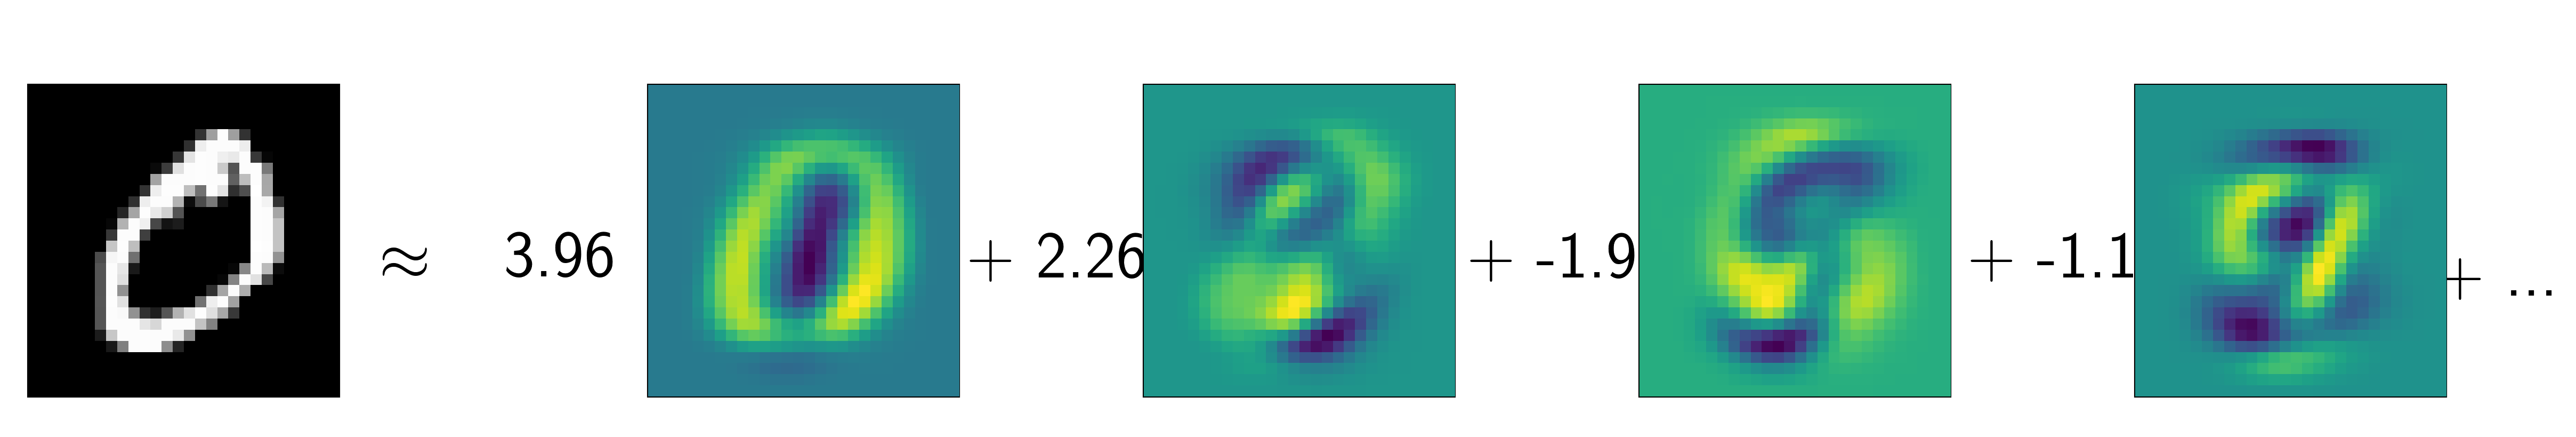

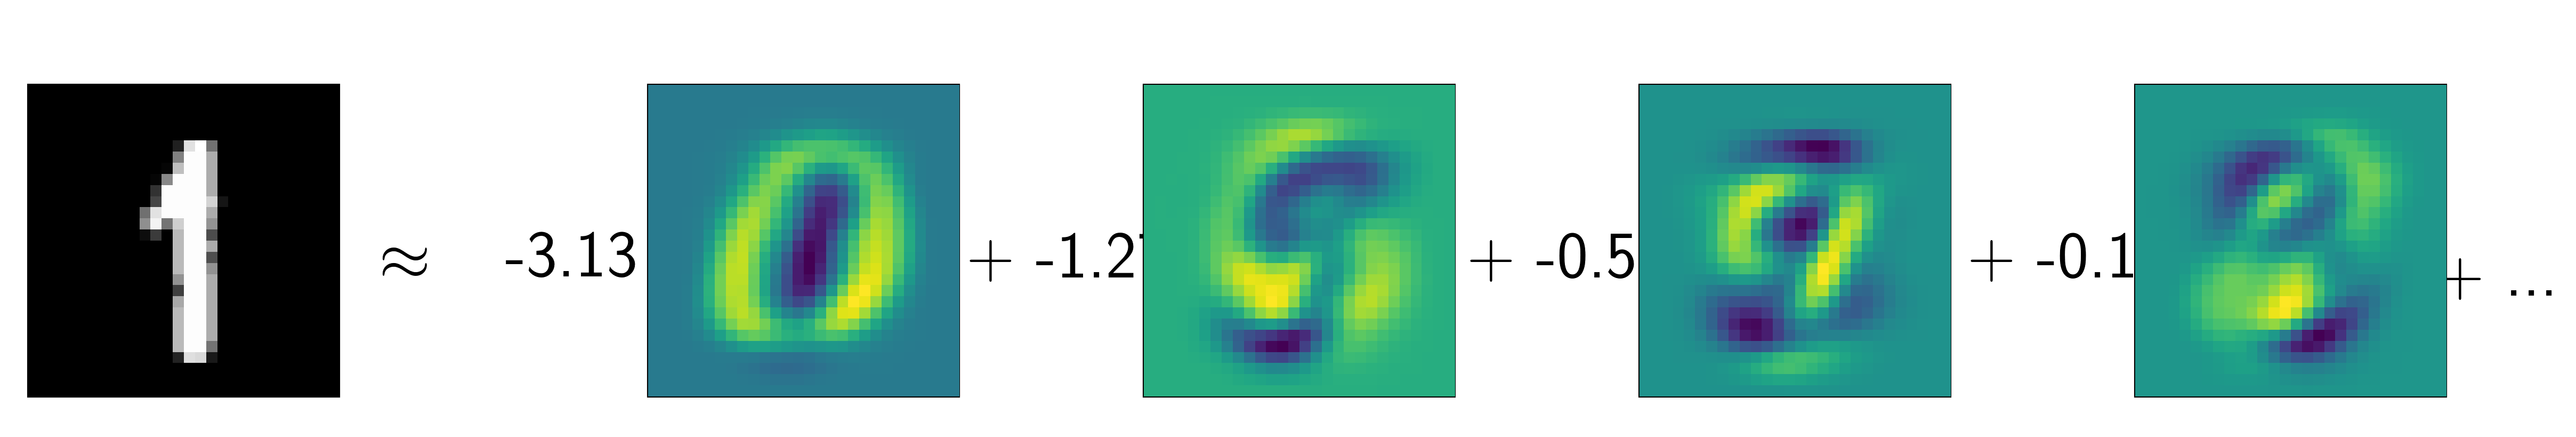

In [75]:
plot_decomposition(mnist.data[0].reshape(28, 28), pca.components_, pca.transform(mnist.data[:1] / 255.)[0])
plot_decomposition(mnist.data[11000].reshape(28, 28), pca.components_, pca.transform(mnist.data[11000:11001] / 255.)[0])

In [57]:
nmf = NMF(n_components=20)
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

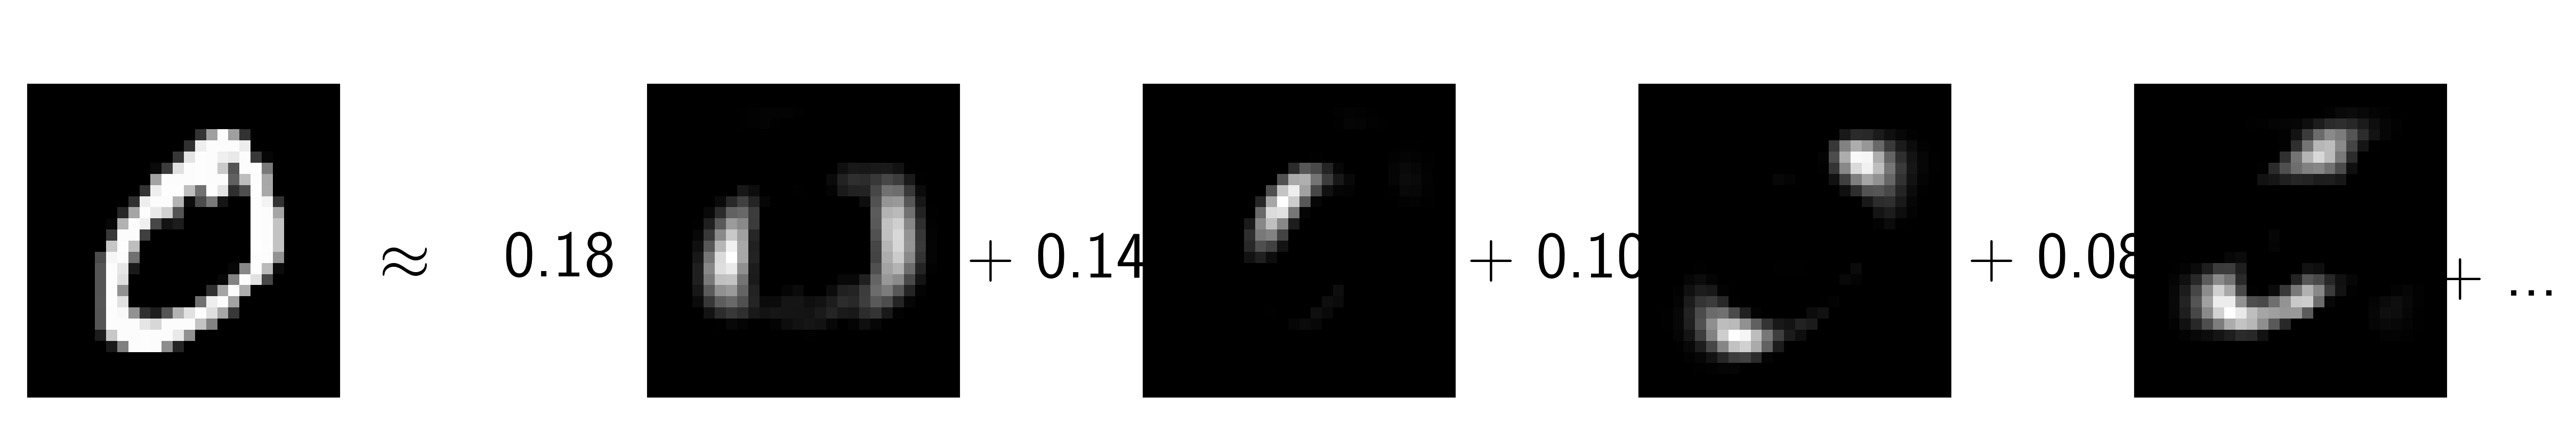

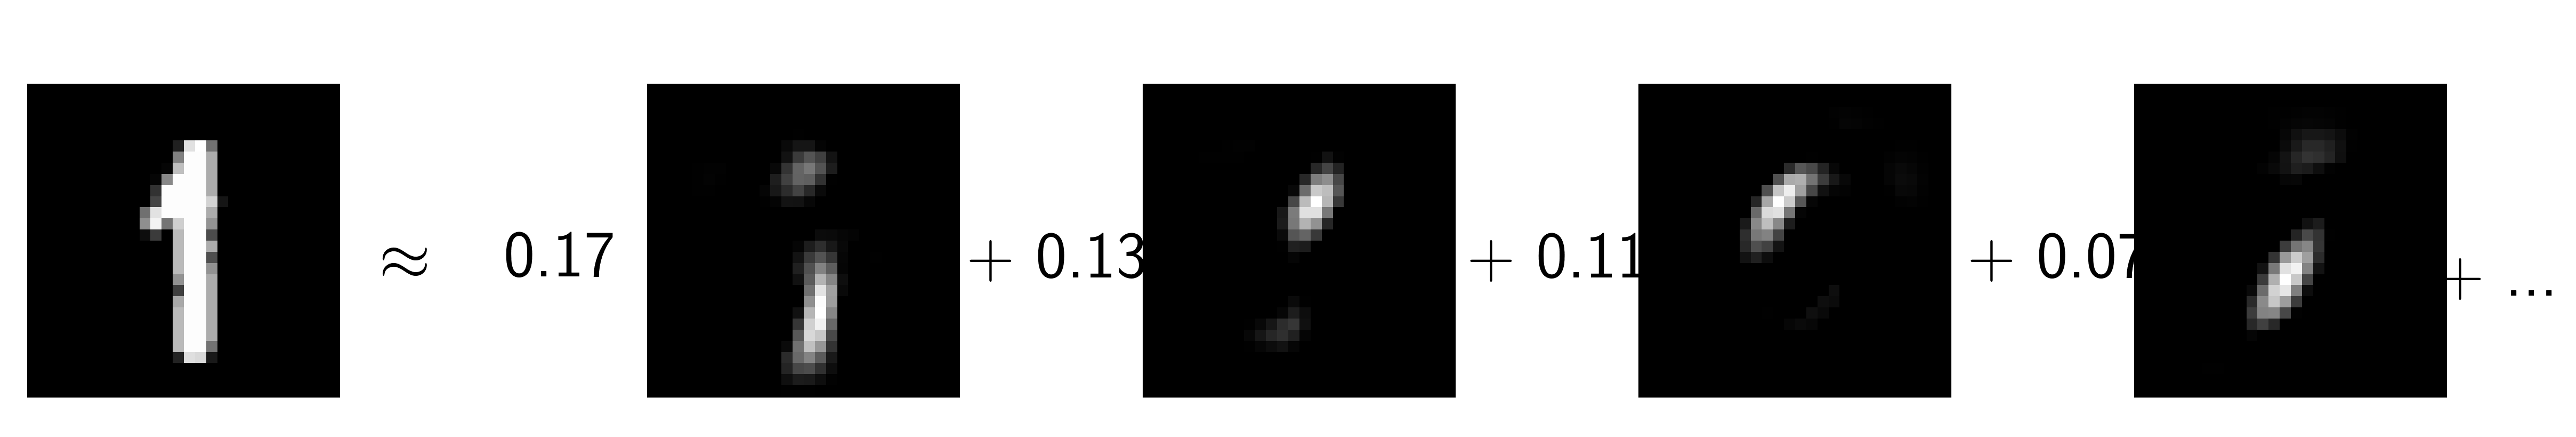

In [76]:
plot_decomposition(mnist.data[0].reshape(28, 28), nmf.components_, nmf.transform(mnist.data[:1] / 255.)[0], cmap="gray")
plot_decomposition(mnist.data[11000].reshape(28, 28), nmf.components_, nmf.transform(mnist.data[11000:11001] / 255.)[0], cmap="gray")

In [77]:
nmf20 = NMF(n_components=20)
nmf20.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [82]:
nmf5 = NMF(n_components=5)
nmf5.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

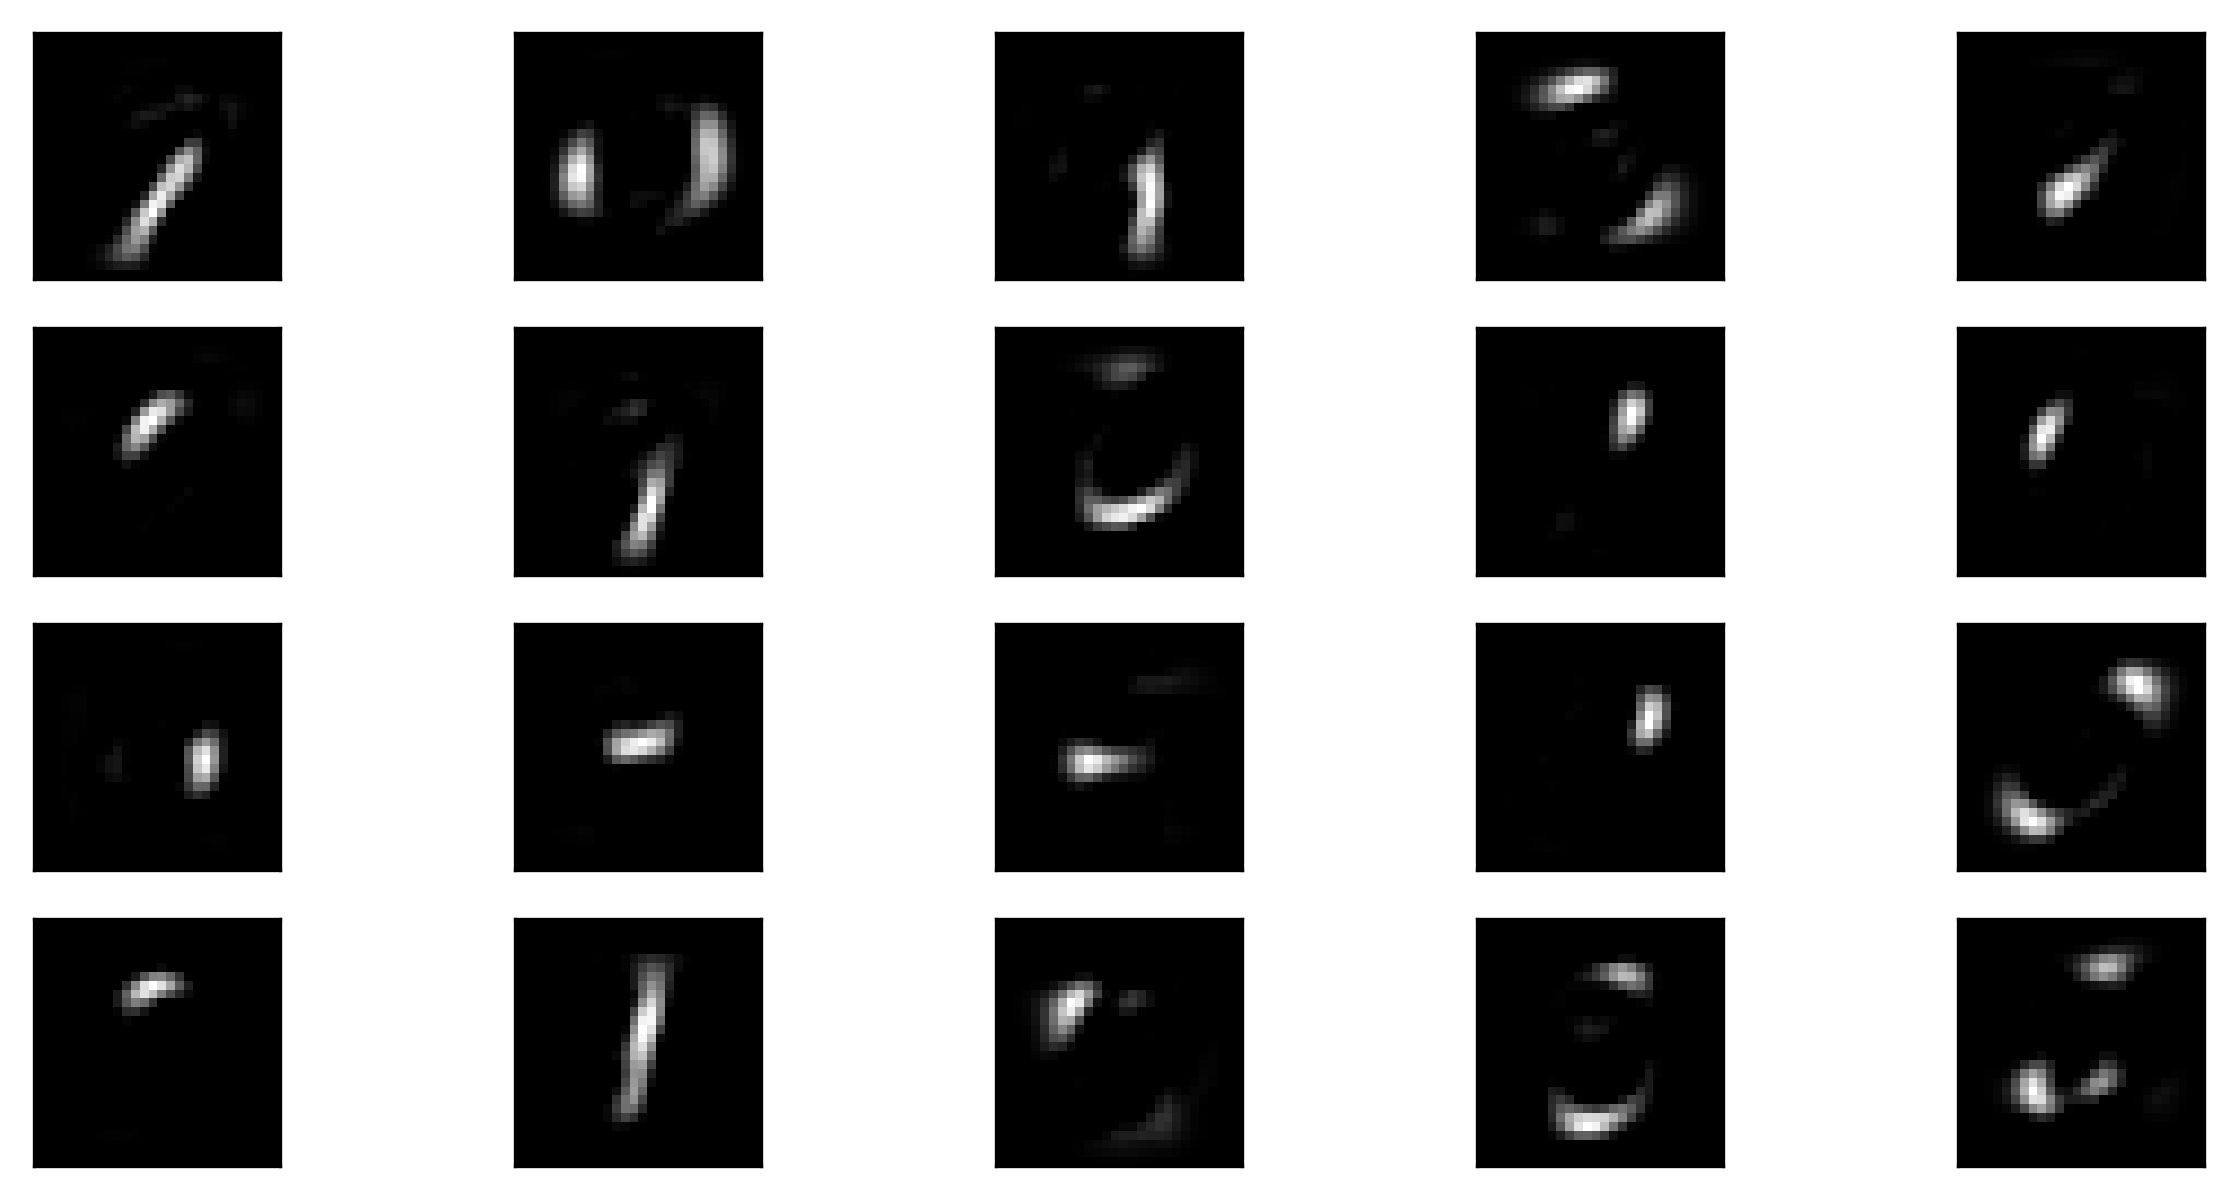

In [80]:
fig, axes = plt.subplots(4, 5, figsize=(10, 5))
for ax, comp in zip(axes.ravel(), nmf20.components_):
    ax.imshow(comp.reshape(28, 28), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())

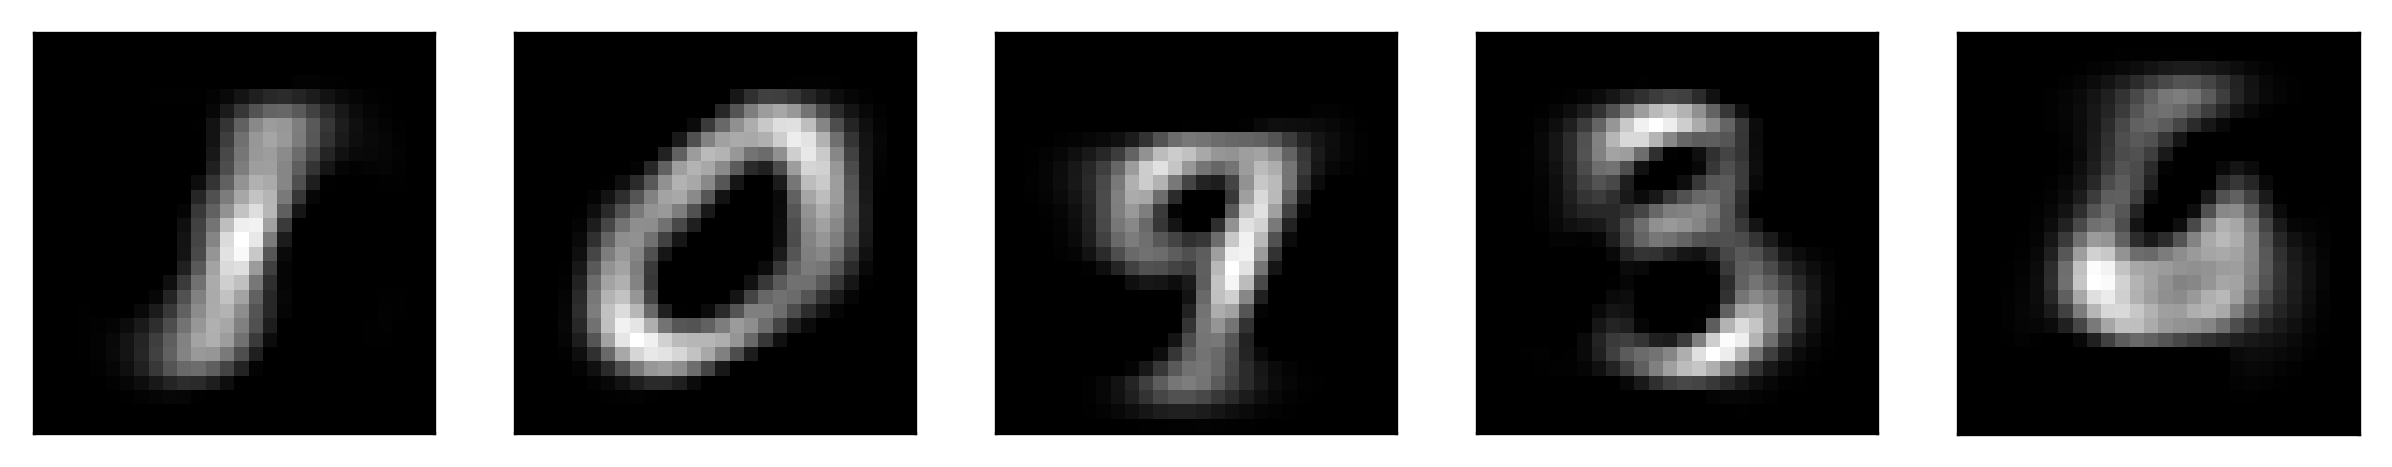

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax, comp in zip(axes.ravel(), nmf5.components_):
    ax.imshow(comp.reshape(28, 28), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())

## Outlier Detection

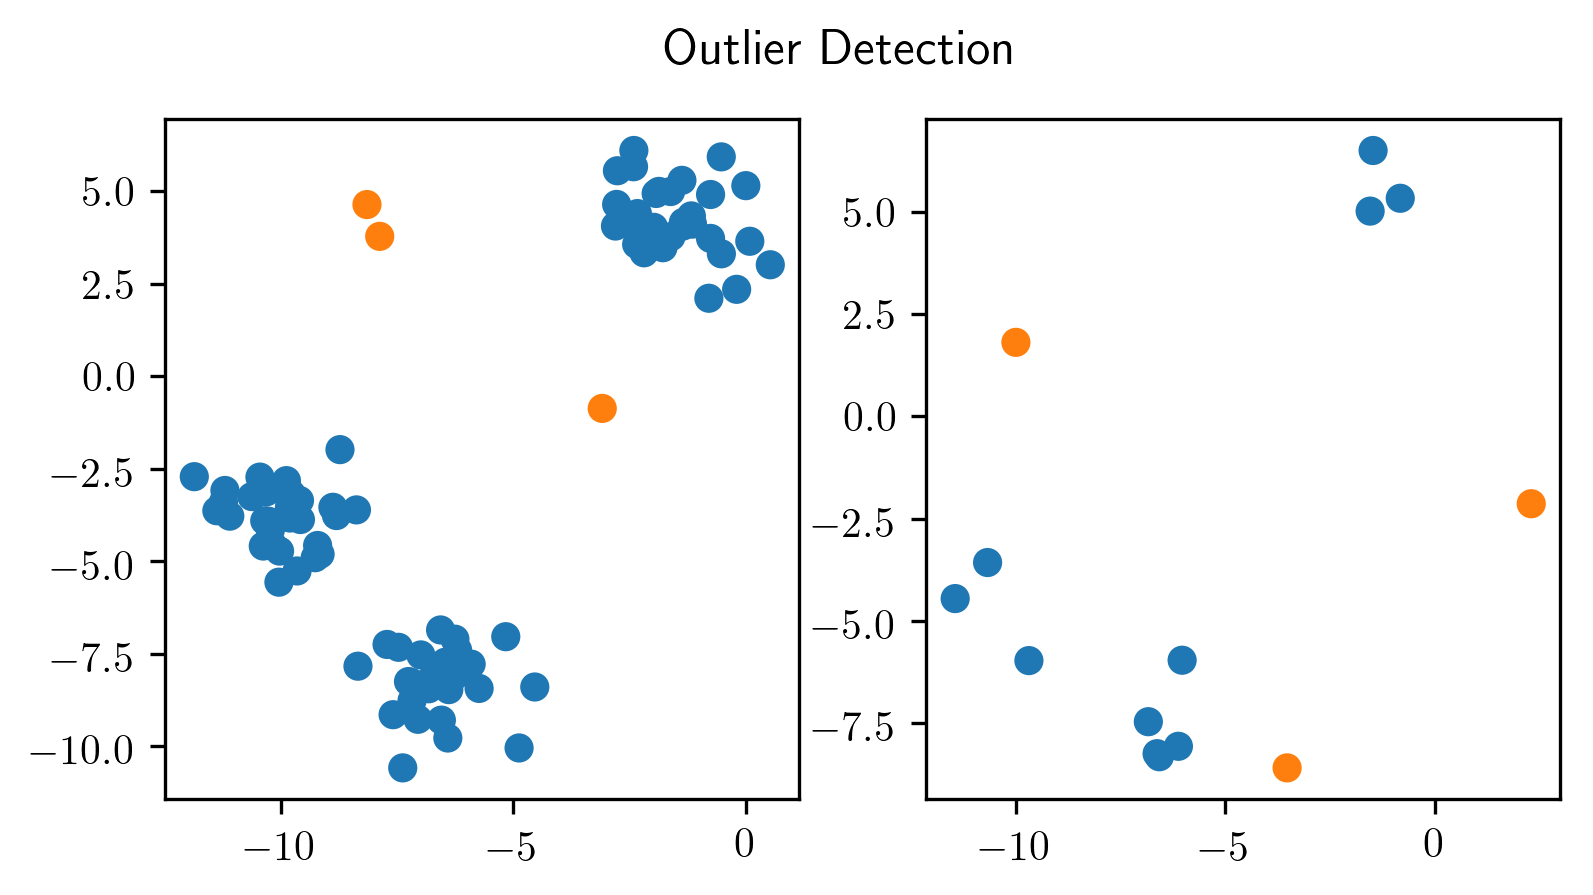

In [121]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
X, y = make_blobs(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)
rng = np.random.RandomState(5)
X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3, 2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1, 1, 1]])
ax[0].scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(y_train_noise))
X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])
ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1], c=plt.cm.Vega10(y_test_noise))
plt.suptitle("Outlier Detection")

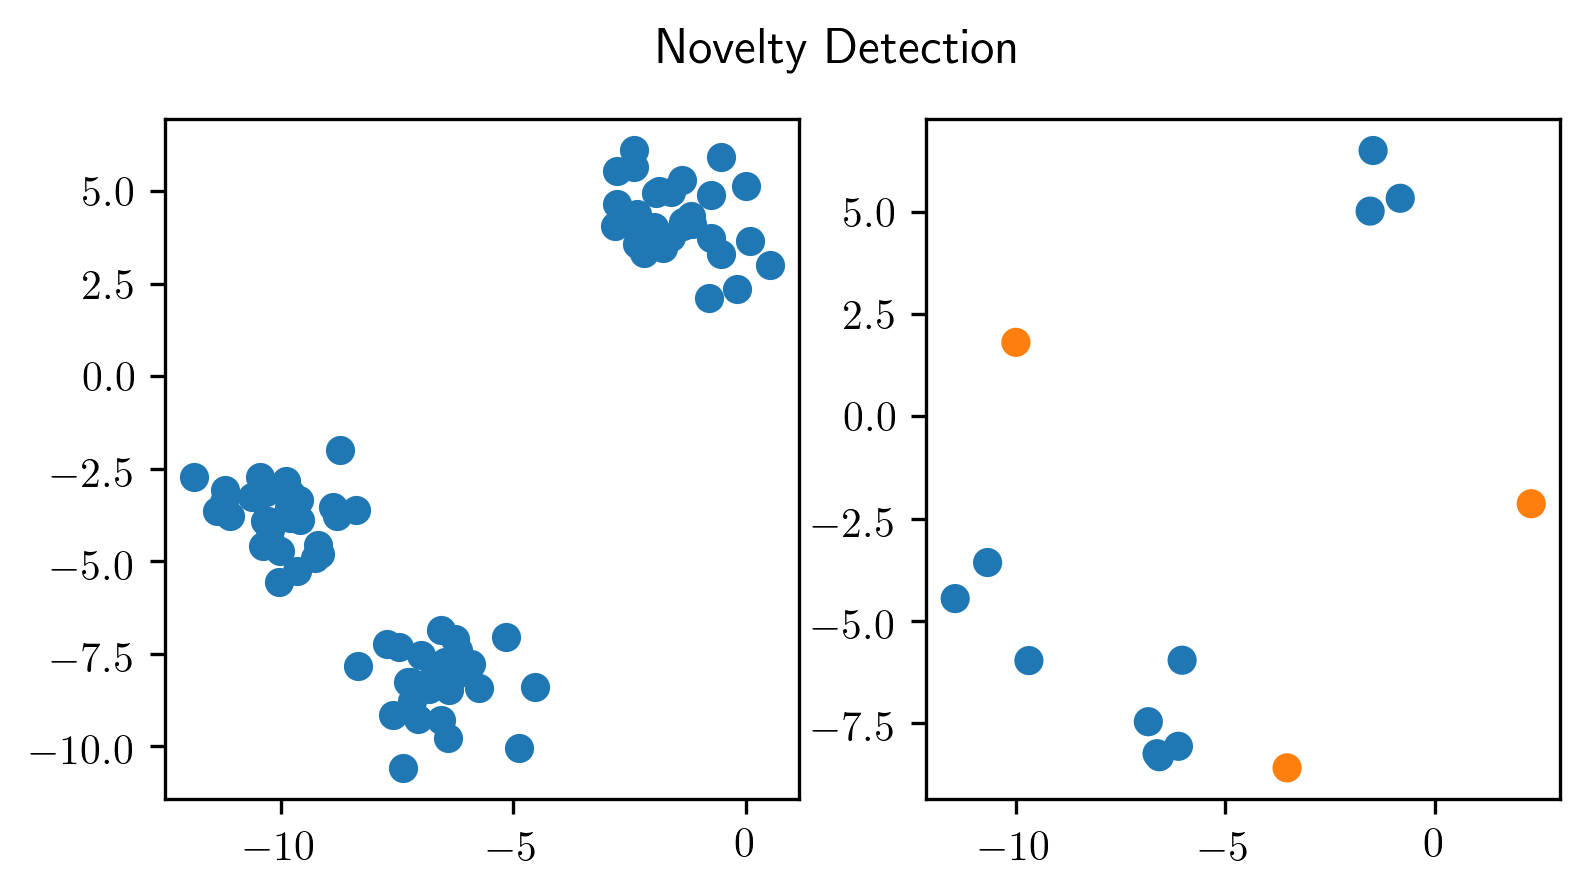

In [123]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
X, y = make_blobs(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)
rng = np.random.RandomState(5)
X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3, 2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1, 1, 1]])
ax[0].scatter(X_train[:, 0], X_train[:, 1])
X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])
ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1], c=plt.cm.Vega10(y_test_noise))
plt.suptitle("Novelty Detection")

([], <a list of 0 Text yticklabel objects>)

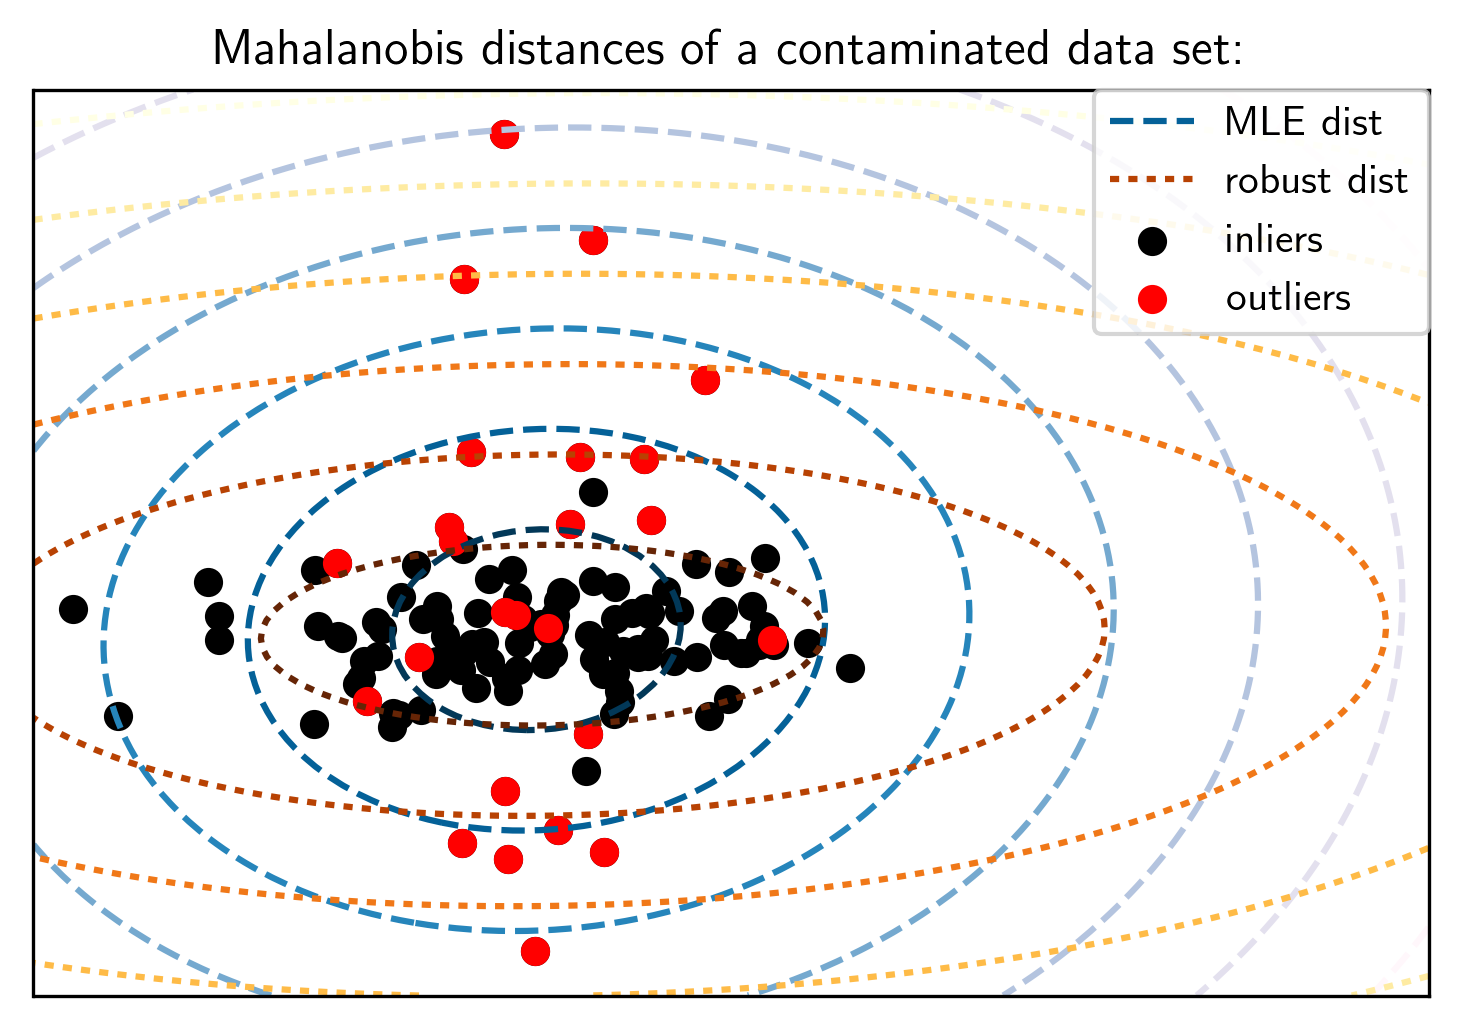

In [129]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# Show data set
subfig1 = plt.gca()
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())



In [137]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X)
pred = ee.predict(X)
print(pred)
print(np.mean(pred == -1))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1]
0.104


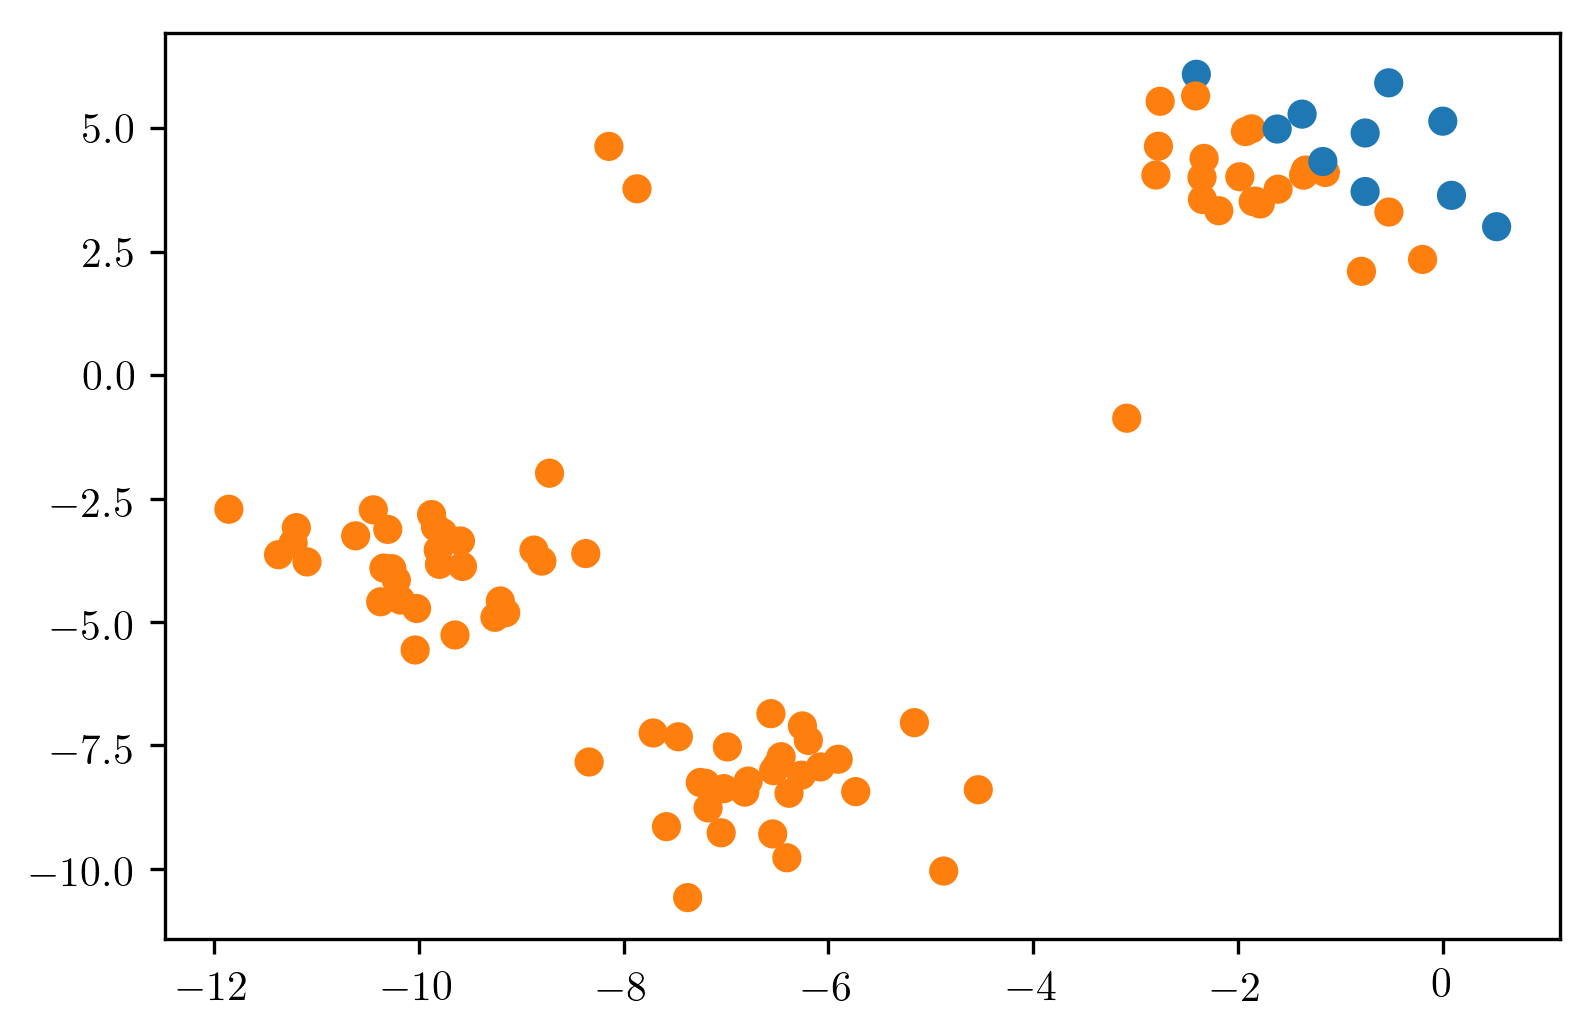

In [138]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X_train_noise)
pred = ee.predict(X_train_noise)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

(-6, -2)

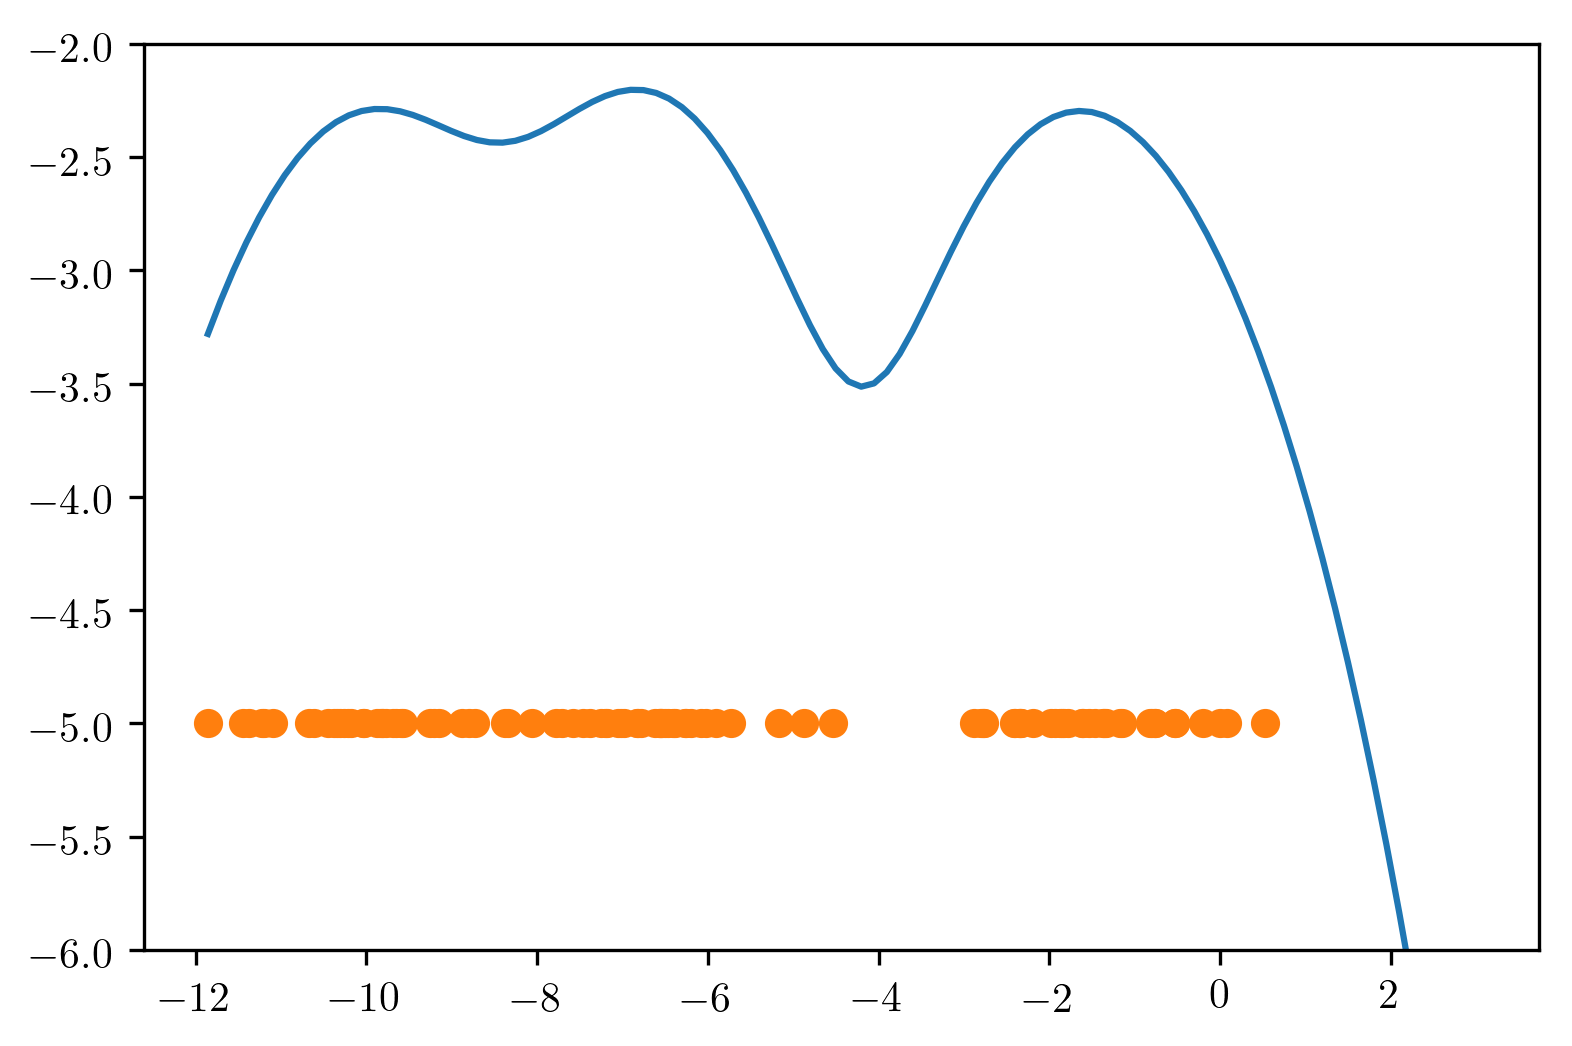

In [160]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity().fit(X_noise[:, :1])

line = np.linspace(X_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density)
plt.plot(X_noise[:, 0], -5 * np.ones(X_noise.shape[0]), 'o')
plt.ylim(-6, -2)

(-7, 1)

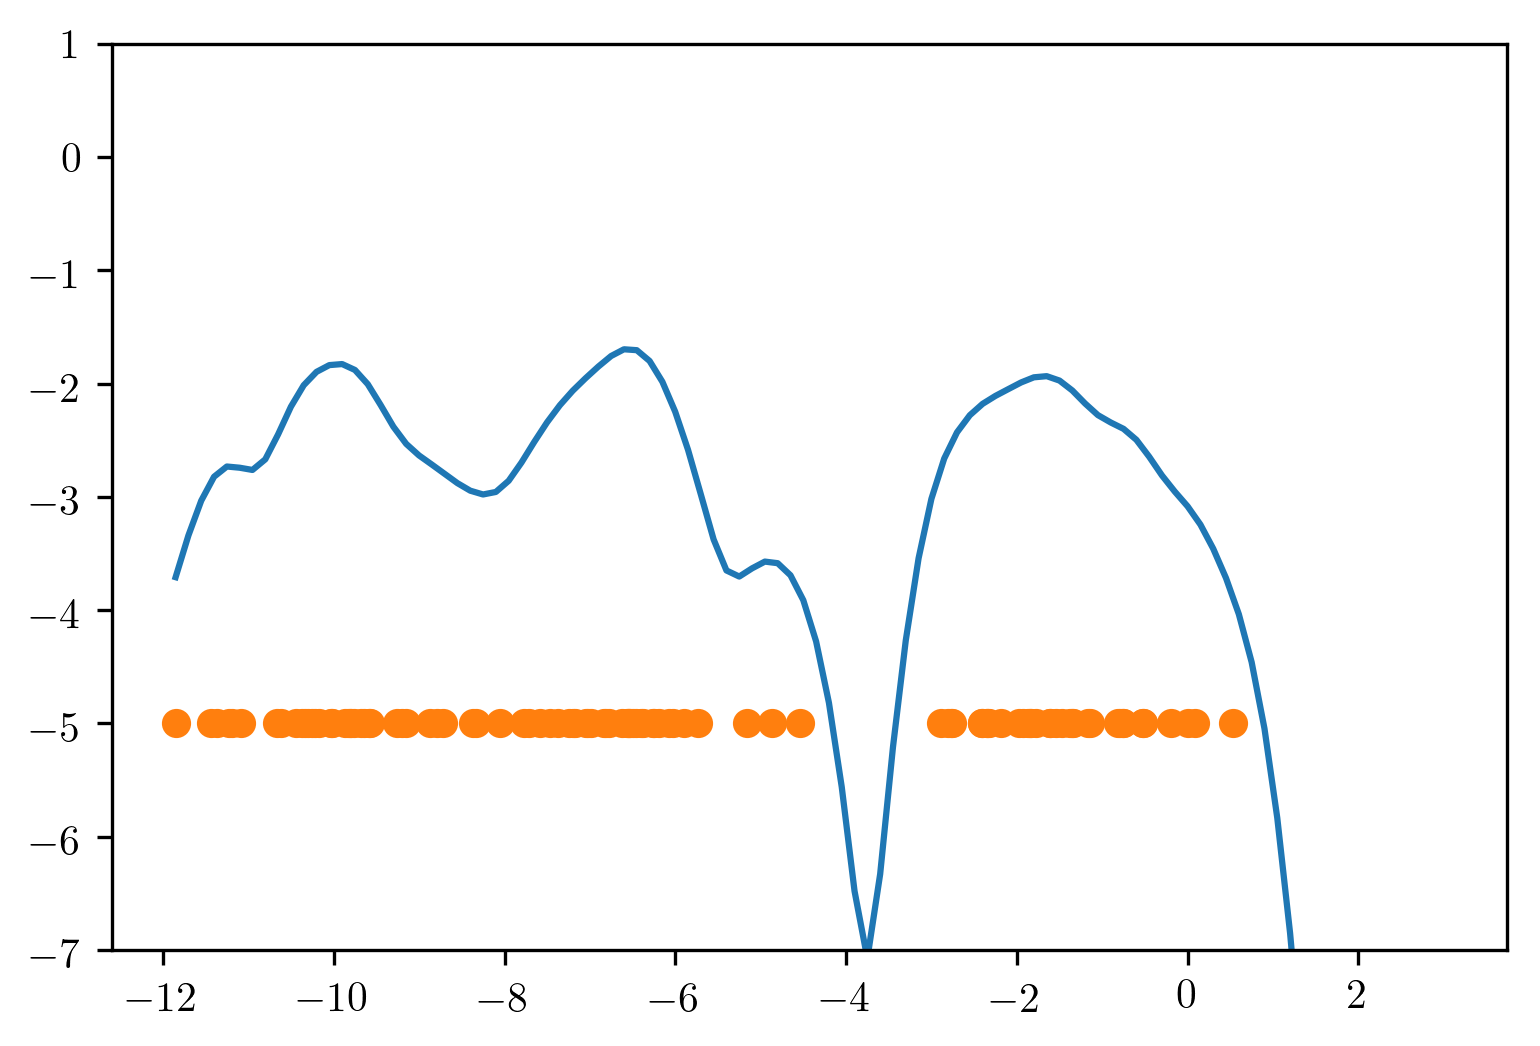

In [165]:
kde = KernelDensity(bandwidth=.3).fit(X_noise[:, :1])

line = np.linspace(X_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density)
plt.plot(X_noise[:, 0], -5 * np.ones(X_noise.shape[0]), 'o')
plt.ylim(-7, 1)

In [202]:
kde = KernelDensity(bandwidth=3)
kde.fit(X_train_noise)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)

array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

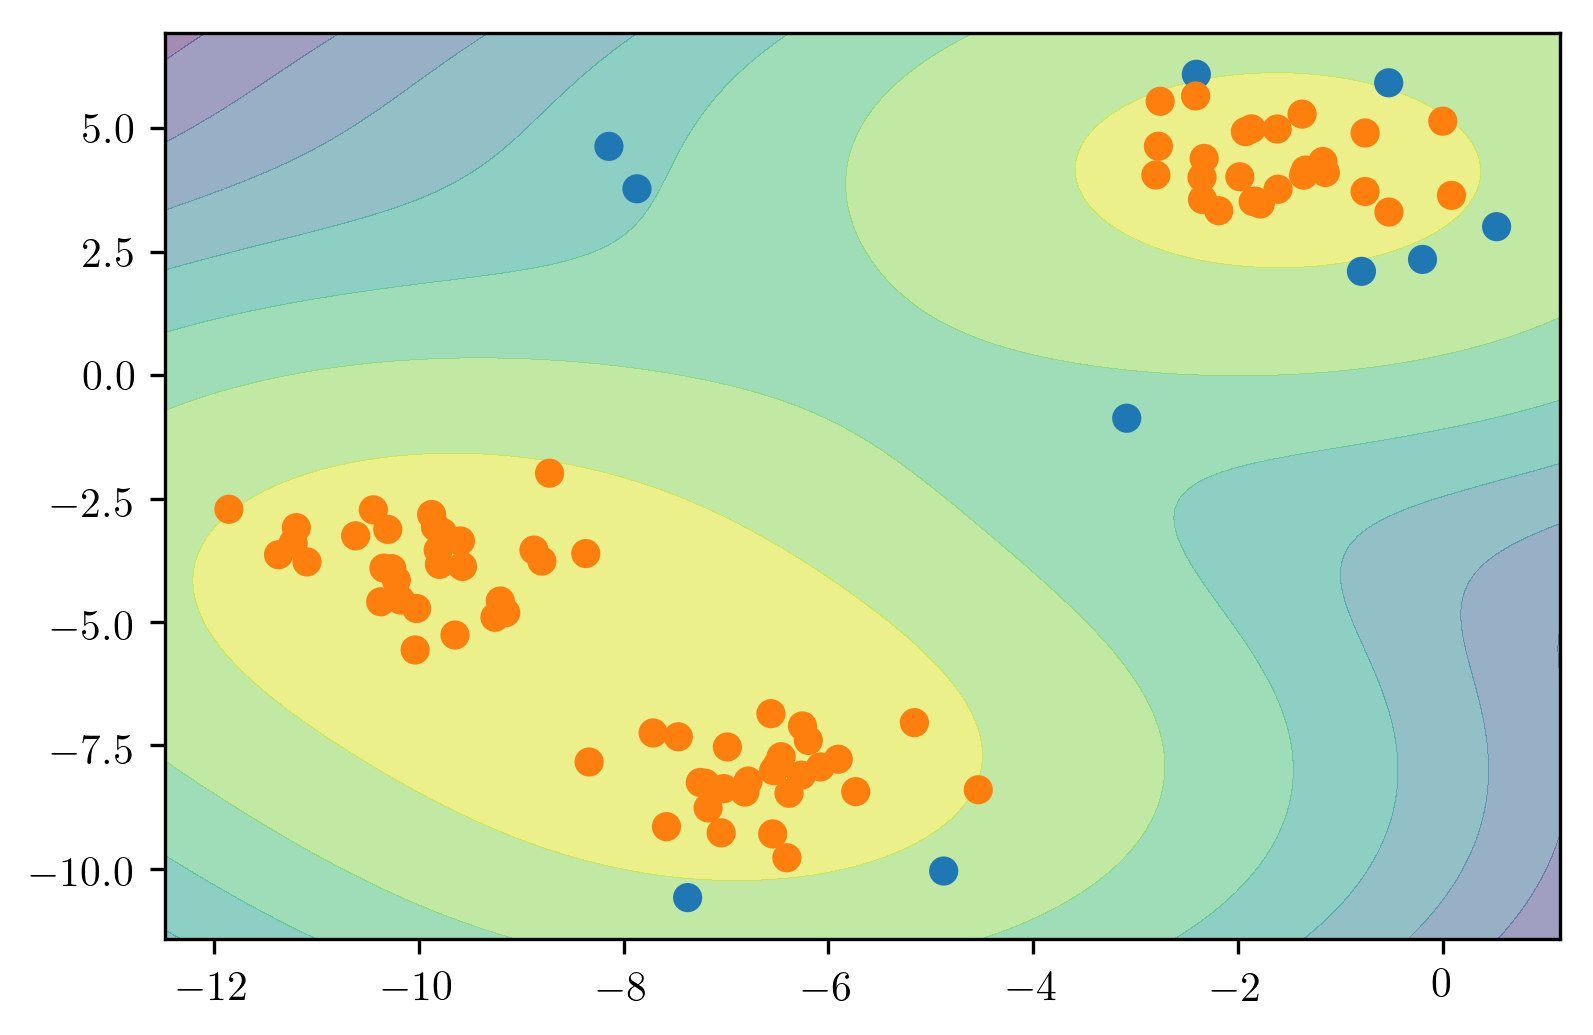

In [201]:
xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = kde.score_samples(np.c_[xx.ravel(), yy.ravel()])

plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

In [228]:
from sklearn.svm import OneClassSVM
scaler = StandardScaler()
X_train_noise_scaled = scaler.fit_transform(X_train_noise)
oneclass = OneClassSVM(nu=.1).fit(X_train_noise_scaled)
pred = oneclass.predict(X_train_noise_scaled).astype(np.int)

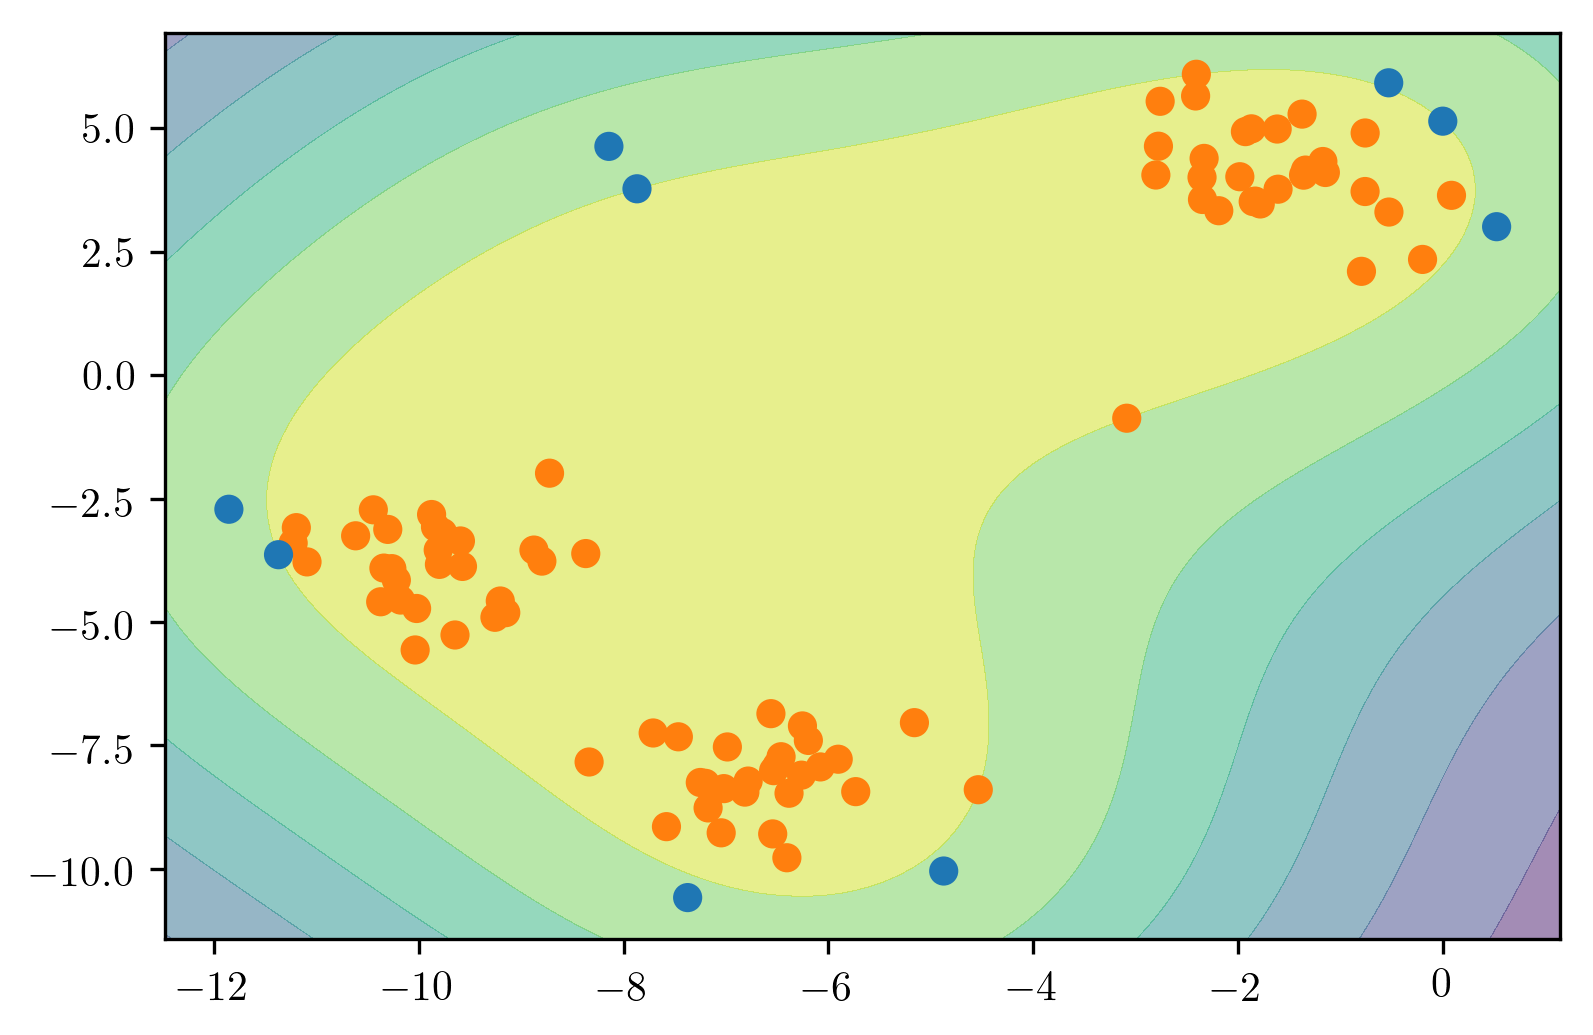

In [229]:
dec = oneclass.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

In [169]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest().fit(X_train_noise)
pred = iso.predict(X_train_noise)

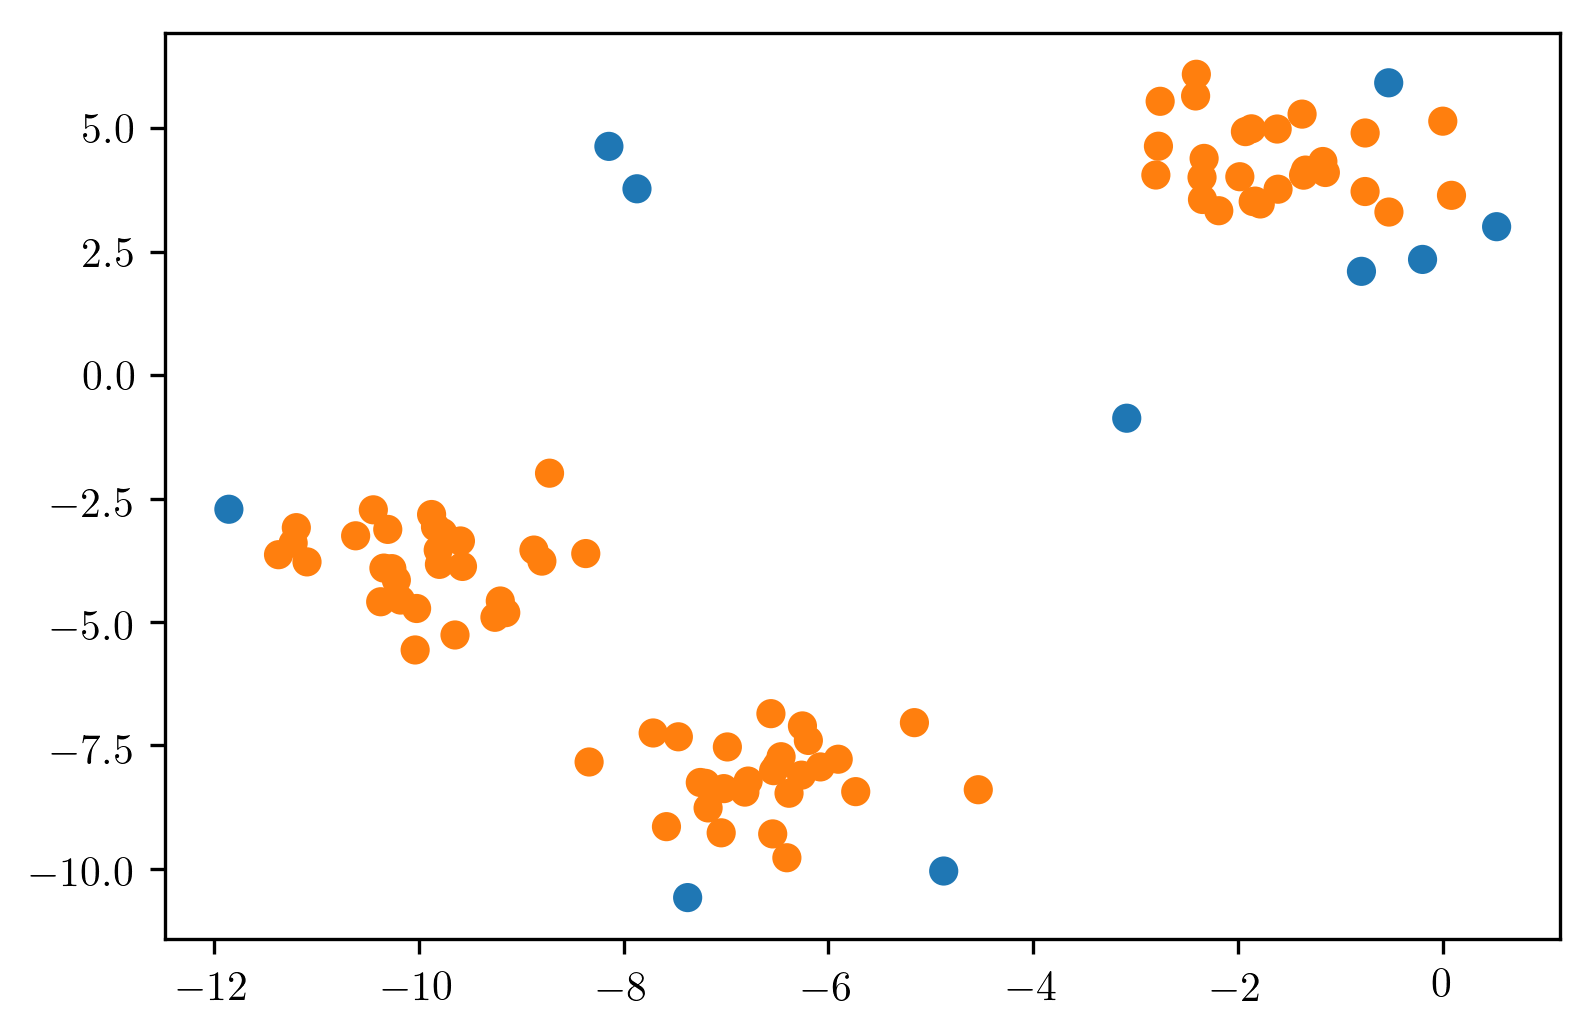

In [175]:
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))
xlim = plt.xlim()
ylim = plt.ylim()

In [178]:
xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = iso.decision_function(np.c_[xx.ravel(), yy.ravel()])

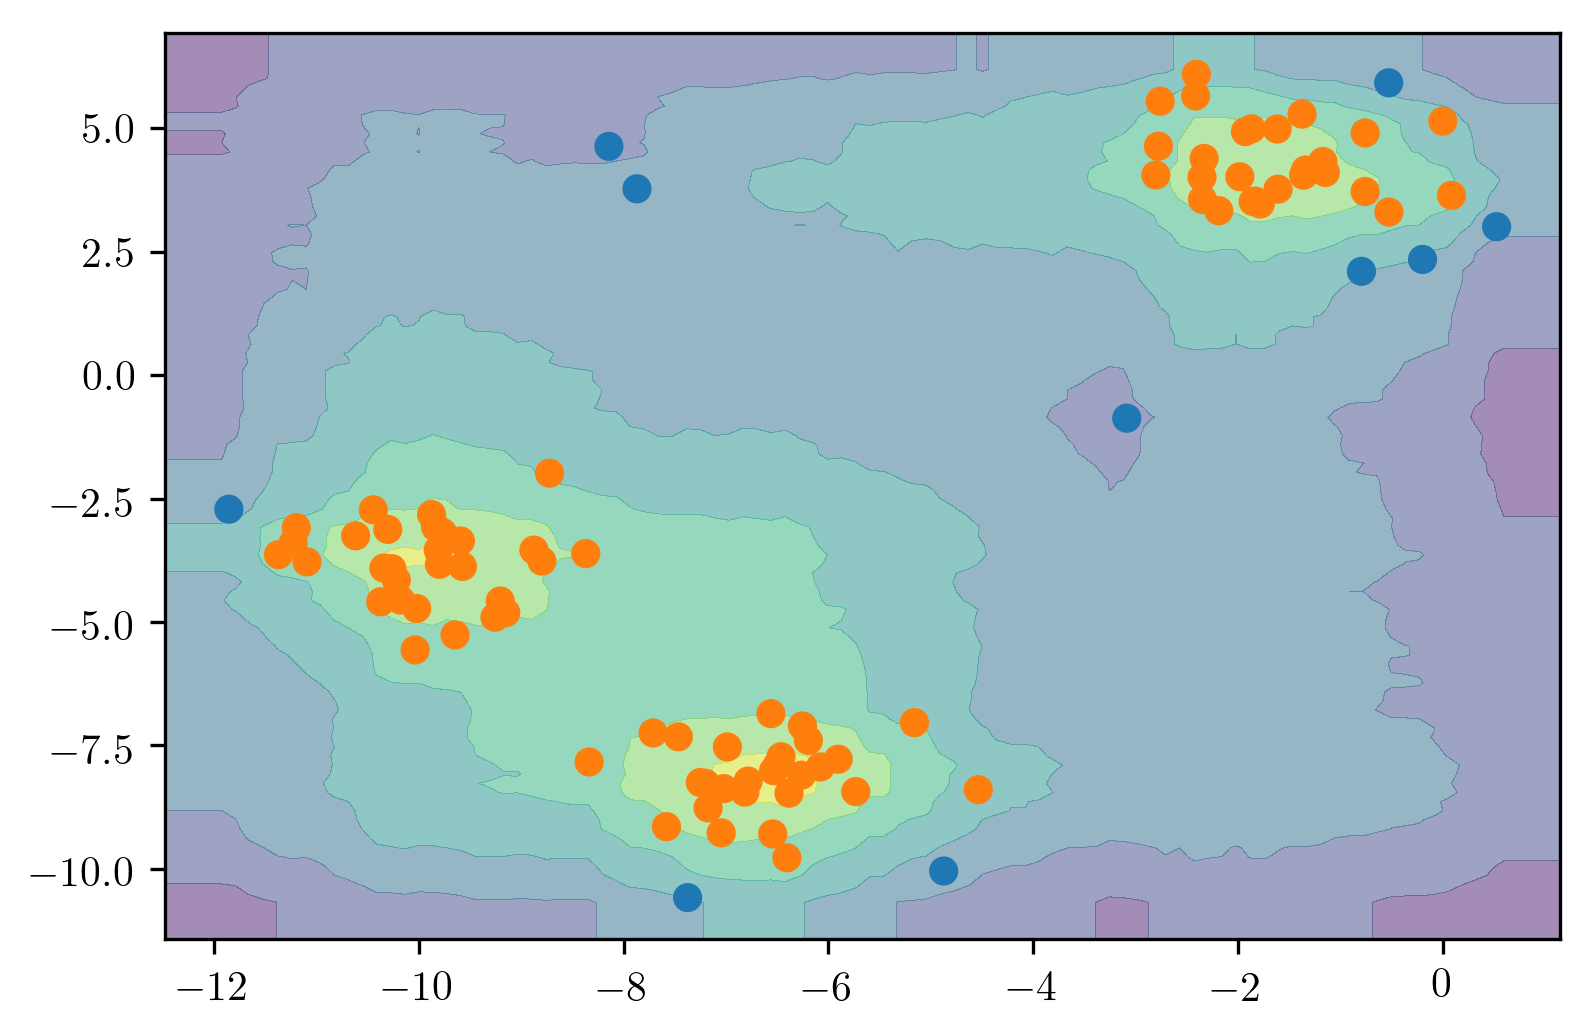

In [180]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))


In [231]:
data = pd.read_csv("creditcard.csv")

In [232]:
data.shape

(284807, 31)

In [233]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Class", axis=1), data.Class, train_size=.1, random_state=0)

In [237]:
X_train.shape

(28480, 30)

In [238]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [240]:
ee = EllipticEnvelope().fit(X_train_scaled)
# => error

ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

In [243]:
from sklearn.decomposition import PCA
X_train_pca = PCA(n_components=.8).fit_transform(X_train_scaled)

In [244]:
ee = EllipticEnvelope().fit(X_train_pca)


In [246]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, ee.mahalanobis(X_train_pca))

0.91699652177871382